# Predicting heart disease using Machine Learning

This machine learning model predicts whether a person has heart disease or not
depending on their medical attribute.

Steps invloved in this project

1. Problem definition
2. Data
3. Evaluation
4. Feauters
5. Modelling
5. Experimenting

# 1.Problem statement
-> Here, the medical attributes of a person are given, can we predict whether that 
person has heart disease or not using the attributes?

# 2.Data

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# 3.Evaluation

The accuracy of the model will be detected in the evaluation step, how well 
the model is performing with the data. If we can reach 95% or more at predicitng,we'll pursue the project.

# 4.Features

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.



# 4.1 Preparing the tools 
Pandas, Matplotlib and NumPy will be imported and 
used for data analysis and manipulation

In [50]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
#it is a majic function, which allows our plots to apper in the notebook
%matplotlib inline

# Importing models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score

# Metrics for model evaluation
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,plot_roc_curve
from sklearn.metrics import classification_report

# 4.2 Loading the data

In [3]:
data=pd.read_csv("heart.csv") # you need to give your csv file path in the brackets
data.shape

(1025, 14)

# 4.3 Data Exploration

This step involves exploratory data analysis(EDA)
* what questions are you trying to solve?
* waht kind of data do we have and how do we treat different types?
* what's missing from the data and how do you deal with it?
* where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out the data?

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<AxesSubplot:>

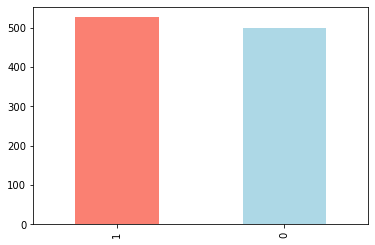

In [5]:
data["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isna().sum() 
#this function returns if any missing values in the data is present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()
#It describes the numerical data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#drawing the relation between sex and heart disease
data.sex.value_counts()



1    713
0    312
Name: sex, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

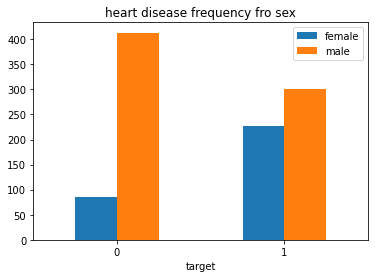

In [10]:
#comparing sex and target
pd.crosstab(data.target,data.sex).plot(kind="bar")
plt.title("heart disease frequency fro sex")
plt.legend(["female","male"]);
plt.xticks(rotation=0)

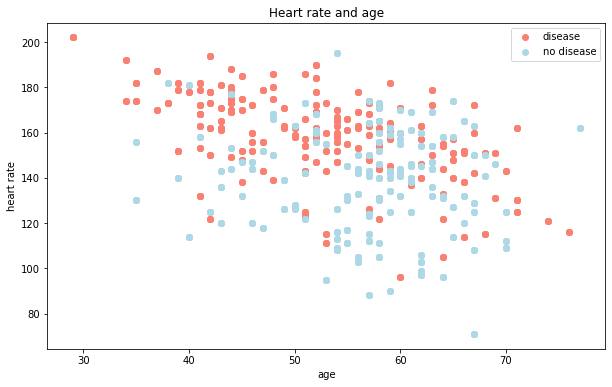

In [11]:
# Age vs Heart Rate for heart disease
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],
           c="salmon")
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c="lightblue")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.title("Heart rate and age")
plt.legend(["disease","no disease"])

Text(0, 0.5, 'amount')

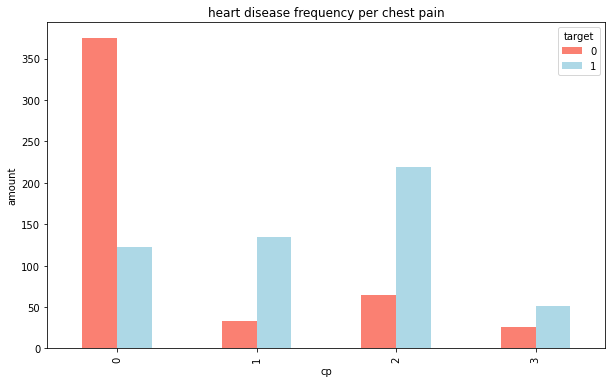

In [12]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease frequency per chest pain")
plt.xlabel("cp")
plt.ylabel("amount")

In [13]:
#finding the correlation between independent and dependent variables
#make a correlation matrix

In [14]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


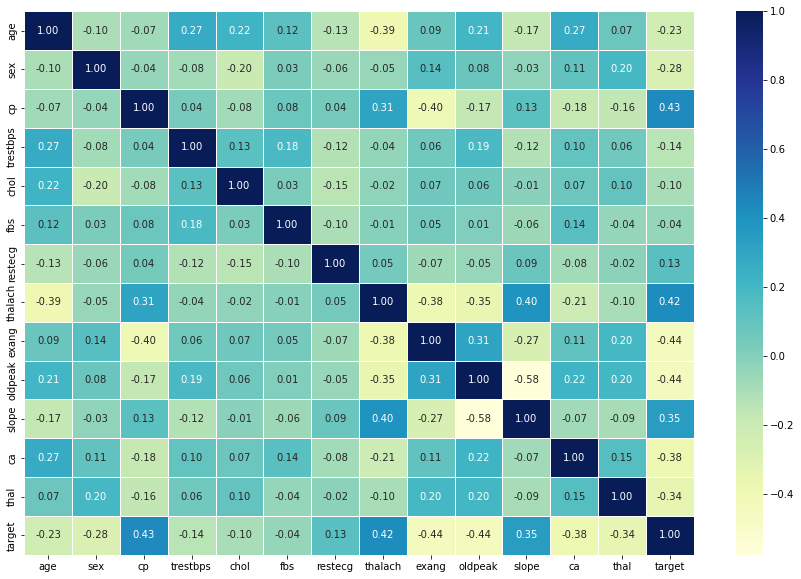

In [15]:
# let's make our correlation matrix a little prettier
corr_matrix= data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# 5. Modelling

In [16]:
# splitting the data into training and testing sets
X=data.drop("target",axis=1)
y=data.target
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
# models that er are going to try
# 1.Logistic Regression
# 2.K-neighbors
# 3.Random Forest classifier

In [18]:
models={"logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
# below function fit and evaluate each model in the "models" dictionary
#it is useful because, instead of train, test and evaluate models individually, we are making use of function and iteration
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)      #fitting the model
        scr=model.score(x_test,y_test)      #evaluating the model
        model_scores[name]=scr
       
    return model_scores
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

In [19]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])

<AxesSubplot:>

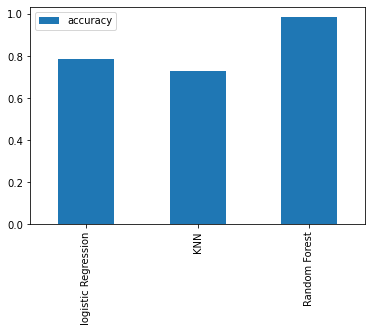

In [20]:
model_compare.T.plot.bar()

 As per our evaluation goal, we have reached almost 98% accuracy which is above our evaluation goal.
here, we can stop our experimenting as we reached our goal. Below steps are for increasing the accuarcy of the model.

# 6. Experimenting

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under curve(AUC)

1.Hyper parameter tuning

hyper parameter tuning using "randomized searchCV" for Logistic regression and random forest classifier

In [21]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
# creating a hyperparameter grid for logisticRegression and random forest

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [24]:
# let's tune our model using randomizedsearchCV
np.random.seed(42)
# 1.tuning logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)
rs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7853658536585366

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [26]:
# 2.Tuning random forest
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)


In [27]:
rs_rf.fit(x_train,y_train)
rs_rf.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.926829268292683

In [28]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [29]:
# Tuning logistic regression using GridSerachCV

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.7853658536585366

# Evaluating our tuned machine learning classifier(randomforest classifier), beyond accuarcy
* roc curve and AUC score
* Confusion matrix
* classification report
* Precison
* Recall
* F1-score

In [38]:
y_preds=rs_rf.predict(x_test)


In [32]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

C:\Users\konda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


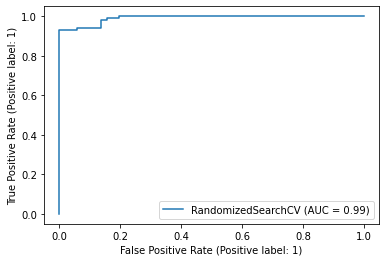

In [39]:
# plotting roc curve and calculate AUC metric
plot_roc_curve(rs_rf,x_test,y_test)

In [42]:
confusion_matrix(y_test,y_preds)

array([[93,  9],
       [ 6, 97]], dtype=int64)

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.92      0.94      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



* calculating evaluation metrics using cross_validation(till now we have calculated evaluation scores on only 1 test set, cross validation will split the whole data set into minimum of 5 test sets and calculate the scores for evary fold)

In [46]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [48]:
clf=RandomForestClassifier(n_estimators= 510,
 min_samples_split= 14,
 min_samples_leaf= 1,
 max_depth= None)

In [51]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")# calculating accuarcy score using cross validation
cv_acc

array([0.99512195, 0.97073171, 0.98536585, 0.96097561, 0.94634146])

In [52]:
np.mean(cv_acc)

0.9717073170731707

In [55]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")# calculating accuarcy score using cross validation
cv_precision
np.mean(cv_precision)

0.9664070612668743

In [57]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")# calculating accuarcy score using cross validation
cv_recall
np.mean(cv_recall)

0.9715543575920934

In [59]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")# calculating accuarcy score using cross validation
cv_f1
np.mean(cv_f1)

0.9706604838125896

In [69]:
cv_plot=pd.DataFrame({
    "accuarcy":cv_acc,
    "precision":cv_precision,
    "recall":cv_recall,
    "f1":cv_f1},index=[0,0,0,0,0])

<AxesSubplot:title={'center':'cross validation scores'}>

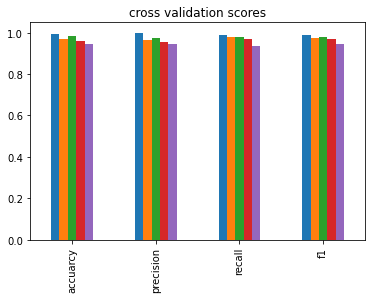

In [70]:
cv_plot.T.plot.bar(title="cross validation scores",legend=False)

# Feature Importance